In [ ]:
pip install pandas scikit-learn numpy

In [ ]:
file_path = '/content/MoviesOnStreamingPlatforms_updated1.csv'
df = pd.read_csv(file_path)
df.head()


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
#Trimming the Dataset
import pandas as pd
import numpy as np


data = pd.read_csv('MoviesOnStreamingPlatforms_updated1.csv')

print("Original data:")
print(data.head())


mean_value = np.mean(data['IMDb'])
std_value = np.std(data['IMDb'])

threshold = 3 * std_value


data_trimmed = data[(data['IMDb'] >= mean_value - threshold) & (data['IMDb'] <= mean_value + threshold)]

print("\nTrimmed data (without outliers):")
print(data_trimmed.head())


Original data:
   ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  18+   8.7             87%   
2   3          Avengers: Infinity War  2018  13+   8.5             84%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  18+   8.8             97%   

   Netflix  Hulu  Prime Video  Disney+  Type                       Directors  \
0      1.0     0            0        0     0               Christopher Nolan   
1      1.0     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2      1.0     0            0        0     0         Anthony Russo,Joe Russo   
3      1.0     0            0        0     0                 Robert Zemeckis   
4      1.0     0            1        0     0                    Sergio Leone   

                             Genres                       C

In [ ]:
#Standardize the Dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("MoviesOnStreamingPlatforms_updated1.csv")

print("Original data:")
print(data.head())

scaler = StandardScaler()


data_scaled = scaler.fit_transform(data[['IMDb']])
data['IMDb'] = data_scaled

print("\nStandardized data:")
print(data.head())


Original data:
   ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  18+   8.7             87%   
2   3          Avengers: Infinity War  2018  13+   8.5             84%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  18+   8.8             97%   

   Netflix  Hulu  Prime Video  Disney+  Type                       Directors  \
0      1.0     0            0        0     0               Christopher Nolan   
1      1.0     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2      1.0     0            0        0     0         Anthony Russo,Joe Russo   
3      1.0     0            0        0     0                 Robert Zemeckis   
4      1.0     0            1        0     0                    Sergio Leone   

                             Genres                       C

In [ ]:
#Imputing the Dataset
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer


data = pd.read_csv('MoviesOnStreamingPlatforms_updated1.csv')

np.random.seed(0)
data_with_missing = data.mask(np.random.random(data.shape) < 0.05)


numerical_columns = data_with_missing.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data_with_missing.select_dtypes(exclude=[np.number]).columns.tolist()


imputer = KNNImputer(n_neighbors=5)
imputed_numerical_data = imputer.fit_transform(data_with_missing[numerical_columns])
imputed_numerical_df = pd.DataFrame(imputed_numerical_data, columns=numerical_columns)


imputed_df = pd.concat([imputed_numerical_df, data_with_missing[categorical_columns].reset_index(drop=True)], axis=1)


missing_values_after = imputed_df.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after)

imputed_df.to_csv('MoviesOnStreamingPlatforms_imputed1.csv', index=False)


Missing values after imputation:
ID                     0
Year                   0
IMDb                   0
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Runtime                0
Title                871
Age                 9749
Rotten Tomatoes    11846
Directors           1503
Genres              1078
Country             1225
Language            1388
dtype: int64


In [ ]:
df1 = pd.read_csv('/content/MoviesOnStreamingPlatforms_imputed1.csv')

In [ ]:
#deffining the new x and y for imputed dataset
df1.info()


x = df1[['IMDb']]
x.info()


y = df1['Year']
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  float64
 1   Year             16744 non-null  float64
 2   IMDb             16744 non-null  float64
 3   Netflix          16744 non-null  float64
 4   Hulu             16744 non-null  float64
 5   Prime Video      16744 non-null  float64
 6   Disney+          16744 non-null  float64
 7   Type             16744 non-null  float64
 8   Runtime          16744 non-null  float64
 9   Title            15873 non-null  object 
 10  Age              6995 non-null   object 
 11  Rotten Tomatoes  4898 non-null   object 
 12  Directors        15241 non-null  object 
 13  Genres           15666 non-null  object 
 14  Country          15519 non-null  object 
 15  Language         15356 non-null  object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
<class 'pan

In [ ]:
# Check the column names of your DataFrame
print(df1.columns)

if df1['Rotten Tomatoes'].all() > 90:
    print(df1['Rotten Tomatoes'])

Index(['ID', 'Year', 'IMDb', 'Netflix', 'Hulu', 'Prime Video', 'Disney+',
       'Type', 'Runtime', 'Title', 'Age', 'Rotten Tomatoes', 'Directors',
       'Genres', 'Country', 'Language'],
      dtype='object')


In [ ]:
df1.isnull().sum()

ID                     0
Year                   0
IMDb                   0
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Runtime                0
Title                871
Age                 9749
Rotten Tomatoes    11846
Directors           1503
Genres              1078
Country             1225
Language            1388
dtype: int64

In [ ]:
x = df1.drop('IMDb', axis = 1)
y = df1['IMDb']

In [ ]:
#MODEL TRAINING

In [ ]:
#Shaping and defining the target variables
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv("/content/MoviesOnStreamingPlatforms_imputed1.csv")


data['IMDb'].fillna(data['IMDb'].mean(), inplace=True)

X = data[['Year', 'Runtime', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']]
y = data[['IMDb', 'Rotten Tomatoes']]


x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

print("Training features shape:", x_train.shape)
print("Test features shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (13395, 6)
Test features shape: (3349, 6)
Training labels shape: (13395, 2)
Test labels shape: (3349, 2)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13395 entries, 1161 to 235
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         13395 non-null  float64
 1   Runtime      13395 non-null  float64
 2   Netflix      13395 non-null  float64
 3   Hulu         13395 non-null  float64
 4   Prime Video  13395 non-null  float64
 5   Disney+      13395 non-null  float64
dtypes: float64(6)
memory usage: 732.5 KB


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3349 entries, 5792 to 12932
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3349 non-null   float64
 1   Runtime      3349 non-null   float64
 2   Netflix      3349 non-null   float64
 3   Hulu         3349 non-null   float64
 4   Prime Video  3349 non-null   float64
 5   Disney+      3349 non-null   float64
dtypes: float64(6)
memory usage: 183.1 KB


In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13395 entries, 1161 to 235
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb             13395 non-null  float64
 1   Rotten Tomatoes  3937 non-null   object 
dtypes: float64(1), object(1)
memory usage: 313.9+ KB


In [ ]:
#Logical Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


data = pd.read_csv("/content/MoviesOnStreamingPlatforms_imputed1.csv")



data['IMDb_class'] = (data['IMDb'] >= 7.9).astype(int)
y = data['IMDb_class']


x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2)


imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)


model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)


y_pred = model.predict(x_test_scaled)
logistic_acc = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression is " + str(logistic_acc))

Accuracy of logistic regression is 0.9575992833681696


In [ ]:
#Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

data = pd.read_csv("/content/MoviesOnStreamingPlatforms_imputed1.csv")


X = data[['Year', 'Runtime', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']]

data['IMDb_class'] = (data['IMDb'] >= 7.9).astype(int)
y = data['IMDb_class']


x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2)


imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)


model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=2)
model_2.fit(x_train_scaled, y_train)


y_pred_2 = model_2.predict(x_test_scaled)
decision_acc = accuracy_score(y_test, y_pred_2)
print("Accuracy of Decision Tree is " + str(decision_acc))

Accuracy of Decision Tree is 0.9567034935801731


In [ ]:
#Gaussian Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


data = pd.read_csv("/content/MoviesOnStreamingPlatforms_imputed1.csv")

X = data[['Year', 'Runtime', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']]


data['IMDb_class'] = (data['IMDb'] >= 7.9).astype(int)
y = data['IMDb_class']


x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2)


imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)


model_3 = GaussianNB()
model_3.fit(x_train_scaled, y_train)


y_pred_3 = model_3.predict(x_test_scaled)
naive_bayes_acc = accuracy_score(y_test, y_pred_3)
print("Accuracy of Gaussian Naive Bayes is " + str(naive_bayes_acc))

Accuracy of Gaussian Naive Bayes is 0.9271424305762914


In [ ]:
#KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


data = pd.read_csv("/content/MoviesOnStreamingPlatforms_imputed1.csv")


X = data[['Year', 'Runtime', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']]


data['IMDb_class'] = (data['IMDb'] >= 7.9).astype(int)
y = data['IMDb_class']


x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2)


imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)


y_pred_knn = knn_model.predict(x_test_scaled)
knn_acc = accuracy_score(y_test, y_pred_knn)
print("Accuracy of K-Nearest Neighbors is " + str(knn_acc))


Accuracy of K-Nearest Neighbors is 0.9650641982681397


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

file_path = '/content/MoviesOnStreamingPlatforms_imputed1.csv'
df = pd.read_csv(file_path)


df = df.drop(columns=['ID', 'Title', 'Directors'])


imputer = SimpleImputer(strategy='most_frequent')

df['Age'] = imputer.fit_transform(df[['Age']]).flatten()
df['IMDb'] = imputer.fit_transform(df[['IMDb']]).flatten()
df['Rotten Tomatoes'] = imputer.fit_transform(df[['Rotten Tomatoes']]).flatten()
df['Genres'] = imputer.fit_transform(df[['Genres']]).flatten()
df['Country'] = imputer.fit_transform(df[['Country']]).flatten()
df['Language'] = imputer.fit_transform(df[['Language']]).flatten()
df['Runtime'] = imputer.fit_transform(df[['Runtime']]).flatten()


label_encoders = {}
categorical_columns = ['Age', 'Genres', 'Country', 'Language', 'Rotten Tomatoes']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


features = df.drop(columns=['IMDb'])
target = df['IMDb']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1.155834226708026


In [ ]:
#KNN Model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import pandas as pd
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.neighbors import NearestNeighbors


file_path = '/content/MoviesOnStreamingPlatforms_imputed1.csv'
df = pd.read_csv(file_path)


df = df.drop(columns=['Age', 'Year', 'Country', 'Language', 'Runtime', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'])
df = df.dropna(subset=['IMDb', 'Genres'])


df['Genres'] = df['Genres'].apply(lambda x: x.split(','))

# Use MultiLabelBinarizer to one-hot encode genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['Genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Combine genres and IMDb rating
features = pd.concat([genres_df, df['IMDb'].reset_index(drop=True)], axis=1)

# Standardizing Again
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


knn = NearestNeighbors(n_neighbors=10, algorithm='auto')
knn.fit(features_scaled)


def recommend_movies(movie_index, num_recommendations=5):
    distances, indices = knn.kneighbors([features_scaled[movie_index]])
    return df.iloc[indices[0][:num_recommendations]]


movie_index = int(input("Enter the index of the movie you like: "))
num_recommendations = int(input("Enter the number of recommendations you want: "))


recommended_movies = recommend_movies(movie_index, num_recommendations)


print("\nRecommended Movies:")
print(recommended_movies[['Title', 'Genres', 'IMDb']])


Enter the index of the movie you like: 20
Enter the number of recommendations you want: 10

Recommended Movies:
                     Title              Genres  IMDb
300                   Guru  [Biography, Drama]   7.7
21      The Social Network  [Biography, Drama]   7.7
4571   You Don't Know Jack  [Biography, Drama]   7.6
496                  Sanju  [Biography, Drama]   7.8
6802          Warm Springs  [Biography, Drama]   7.5
204                 Trumbo  [Biography, Drama]   7.5
2957     Gour Hari Dastaan  [Biography, Drama]   7.5
12793               Margot  [Biography, Drama]   7.5
16270   The Straight Story  [Biography, Drama]   8.0
22      Dallas Buyers Club  [Biography, Drama]   8.0


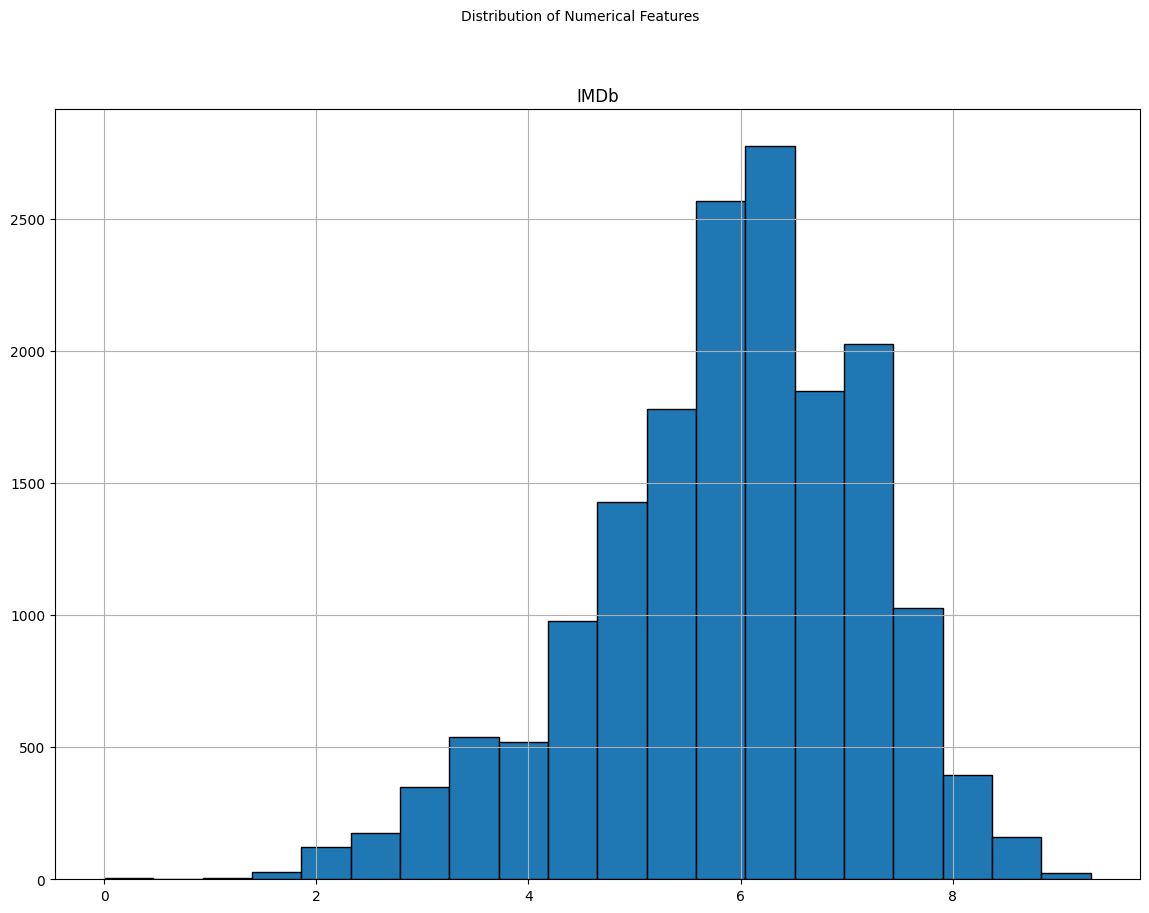

In [ ]:
# DISTRIBUTION OF NUMERICAL FEATURES
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/MoviesOnStreamingPlatforms_imputed1.csv')

numerical_features = ['IMDb']

data[numerical_features].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', size=10)
plt.show()

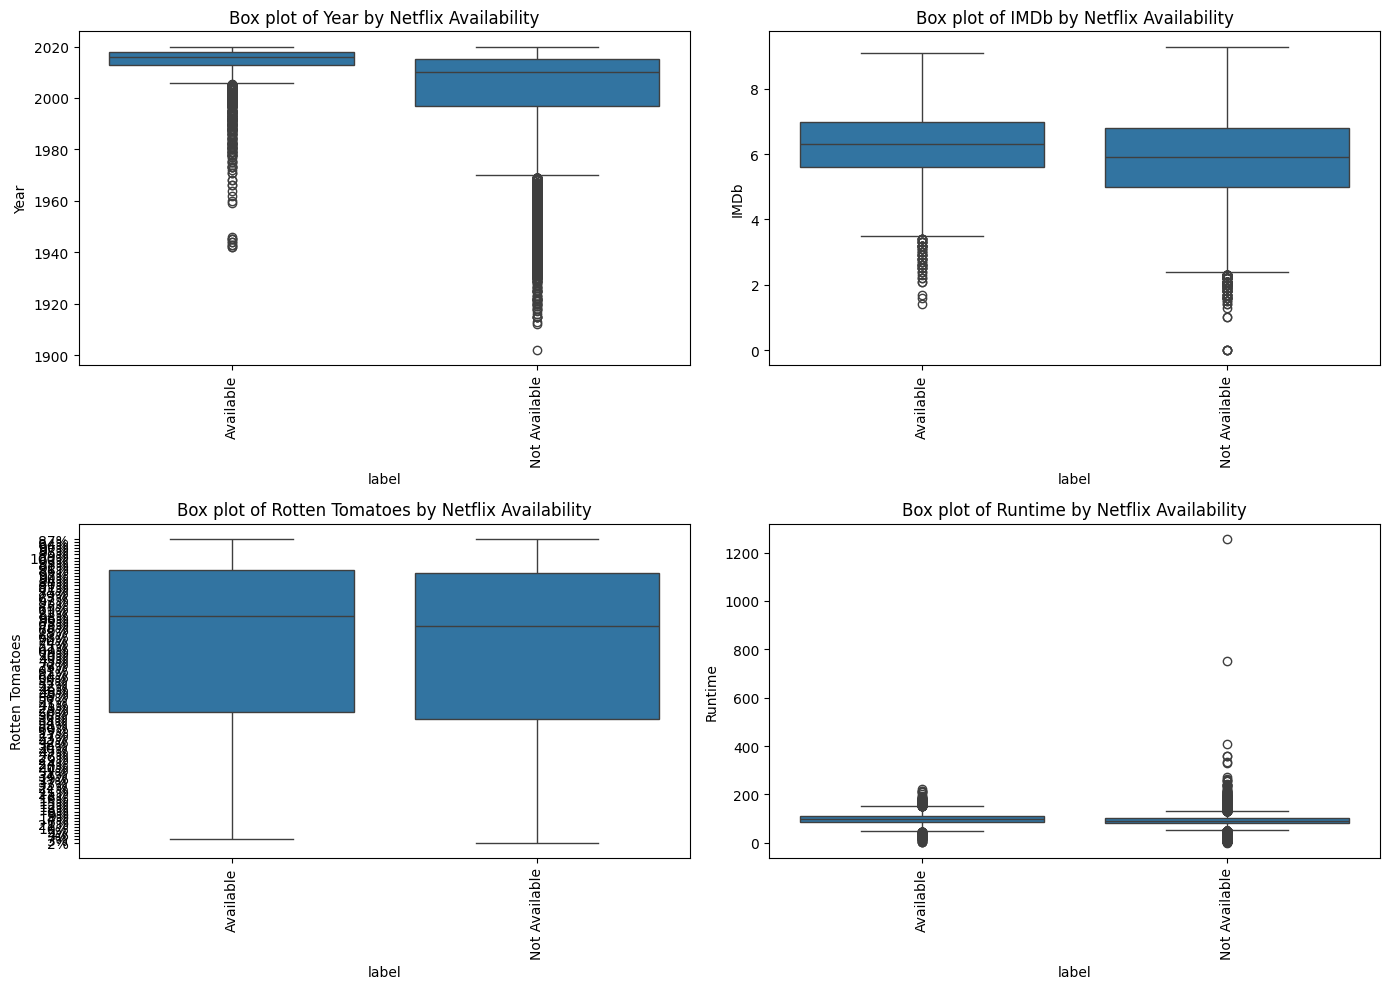

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Year', 'IMDb', 'Rotten Tomatoes', 'Runtime']


data['label'] = data['Netflix'].apply(lambda x: 'Available' if x == 1 else 'Not Available')

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='label', y=feature, data=data)
    plt.title(f'Box plot of {feature} by Netflix Availability')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


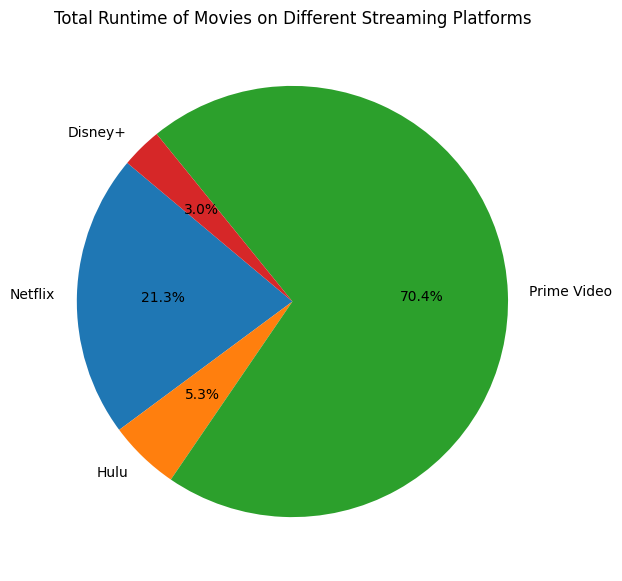

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/content/MoviesOnStreamingPlatforms_imputed1.csv'
data = pd.read_csv(file_path)


platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
runtime_totals = {platform: data[data[platform] == 1]['Runtime'].sum() for platform in platforms}


plt.figure(figsize=(10, 7))
plt.pie(runtime_totals.values(), labels=runtime_totals.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Total Runtime of Movies on Different Streaming Platforms')
plt.show()


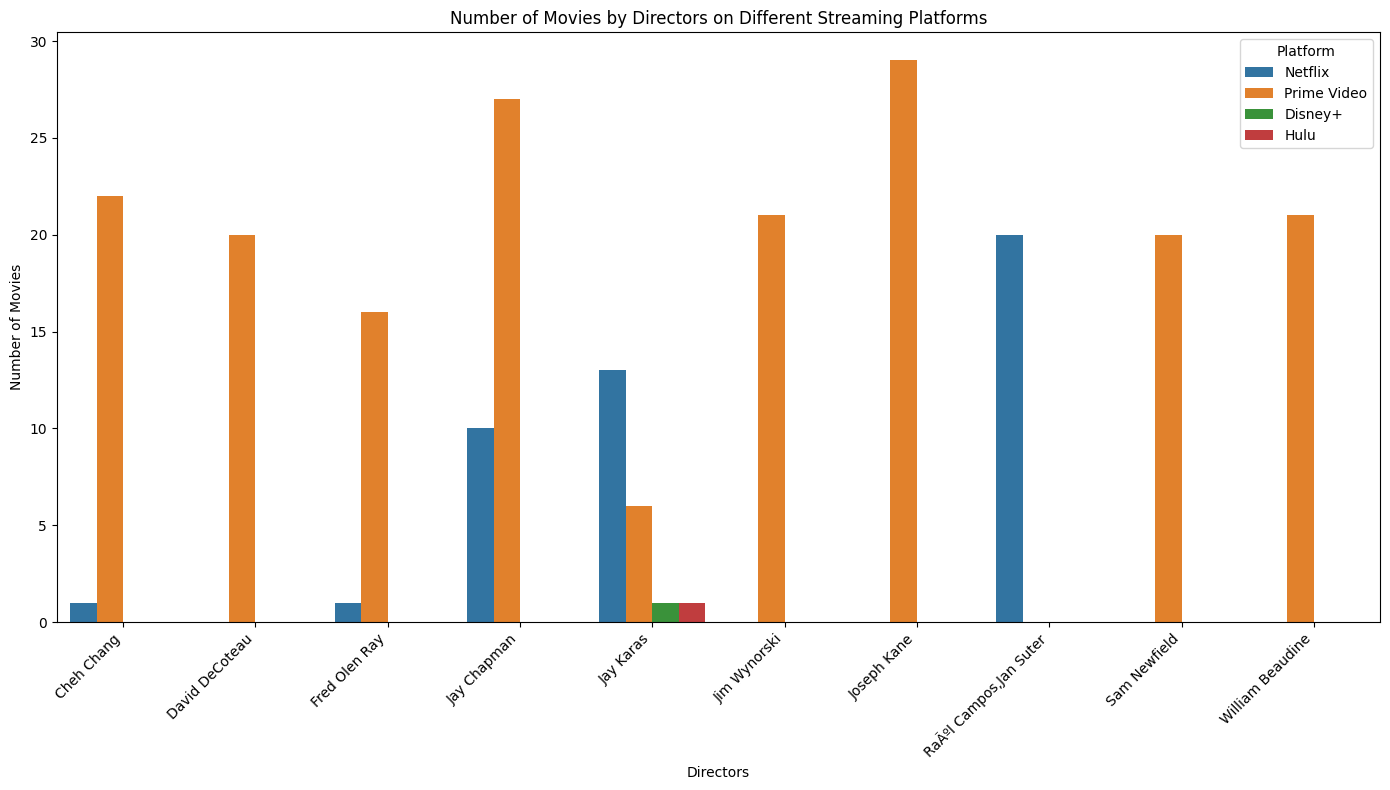

In [ ]:
#Movies By director on diff platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/MoviesOnStreamingPlatforms_imputed1.csv'
data = pd.read_csv(file_path)


data = data.dropna(subset=['Directors'])


platform_counts = data.melt(id_vars=['Directors'], value_vars=['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
                            var_name='Platform', value_name='Availability')
platform_counts = platform_counts[platform_counts['Availability'] == 1]


director_platform_counts = platform_counts.groupby(['Directors', 'Platform']).size().reset_index(name='Movie Count')


top_directors = director_platform_counts.groupby('Directors')['Movie Count'].sum().nlargest(10).index
top_directors_data = director_platform_counts[director_platform_counts['Directors'].isin(top_directors)]


plt.figure(figsize=(14, 8))
sns.barplot(data=top_directors_data, x='Directors', y='Movie Count', hue='Platform')
plt.title('Number of Movies by Directors on Different Streaming Platforms')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Directors')
plt.ylabel('Number of Movies')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


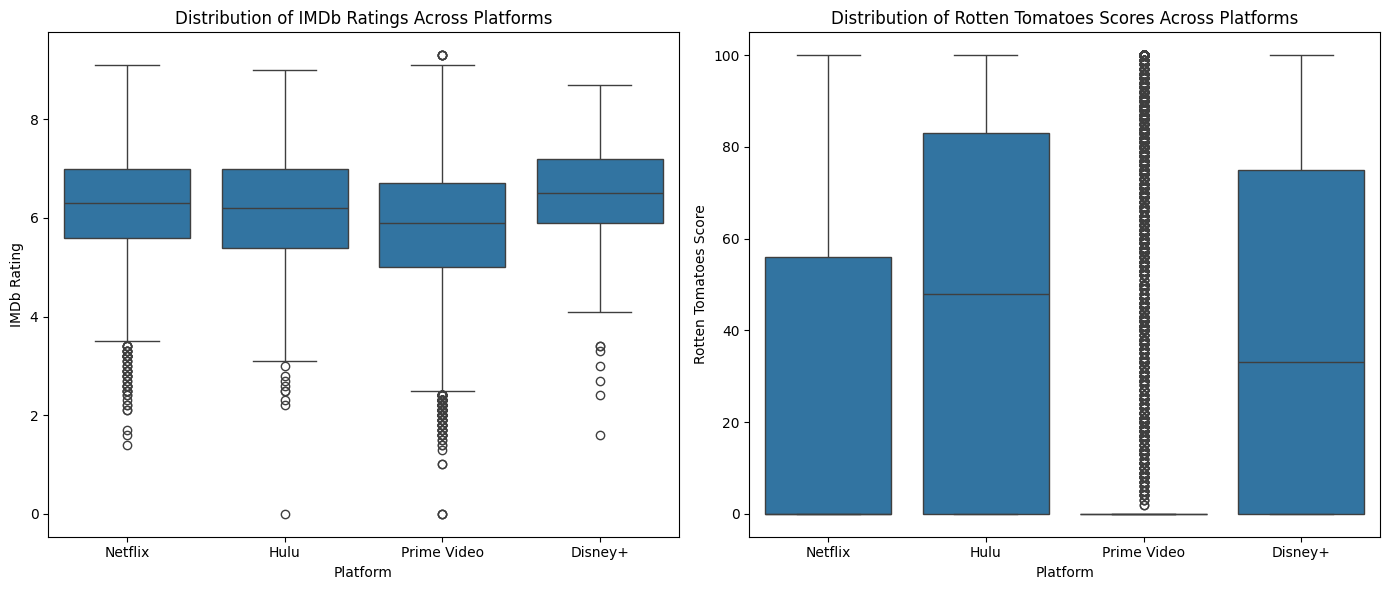

In [ ]:
#IMDB rating and Rotten tomatoes with platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("/content/MoviesOnStreamingPlatforms_imputed1.csv")


data['IMDb'] = data['IMDb'].fillna(0)
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].str.rstrip('%').astype('float').fillna(0)


platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
ratings_data = data.melt(id_vars=['IMDb', 'Rotten Tomatoes'], value_vars=platforms,
                         var_name='Platform', value_name='Available')
ratings_data = ratings_data[ratings_data['Available'] == 1]


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=ratings_data, x='Platform', y='IMDb')
plt.title('Distribution of IMDb Ratings Across Platforms')
plt.xlabel('Platform')
plt.ylabel('IMDb Rating')


plt.subplot(1, 2, 2)
sns.boxplot(data=ratings_data, x='Platform', y='Rotten Tomatoes')
plt.title('Distribution of Rotten Tomatoes Scores Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Rotten Tomatoes Score')

plt.tight_layout()
plt.show()


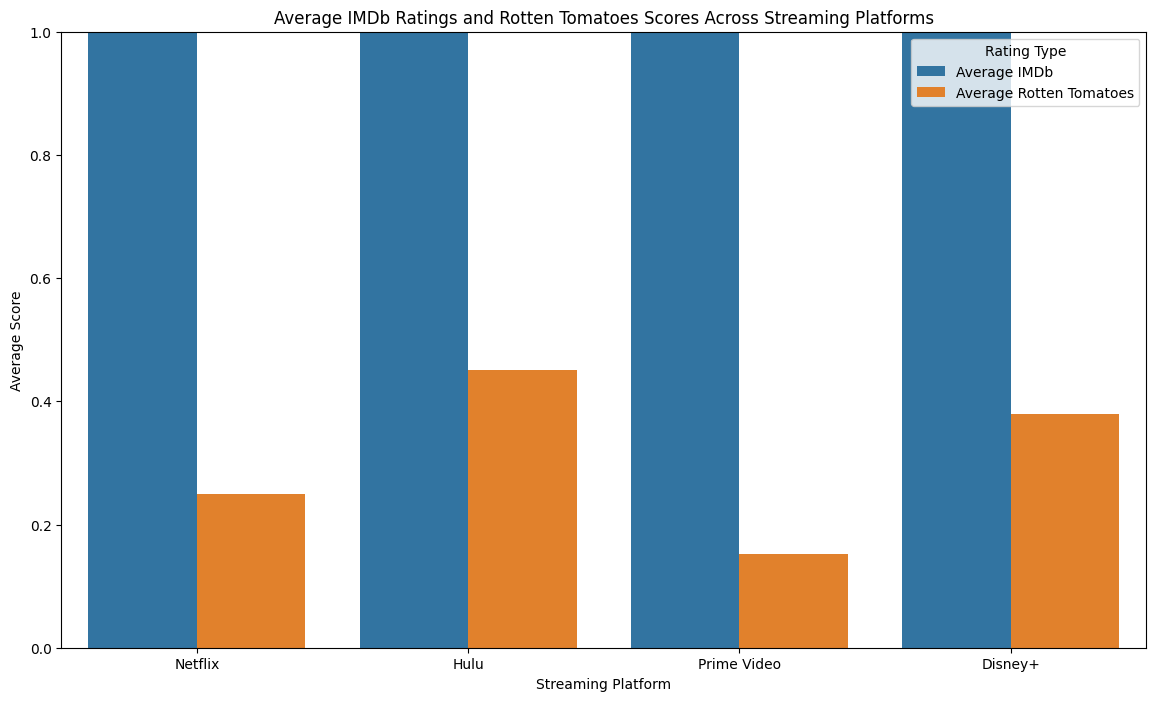

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/MoviesOnStreamingPlatforms_imputed1.csv'
data = pd.read_csv(file_path)


data['IMDb'].fillna(0, inplace=True)
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].str.rstrip('%').astype('float') / 100.0
data['Rotten Tomatoes'].fillna(0, inplace=True)

platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
avg_ratings_list = []


for platform in platforms:
    avg_imdb = data[data[platform] == 1]['IMDb'].mean()
    avg_rt = data[data[platform] == 1]['Rotten Tomatoes'].mean()
    avg_ratings_list.append({'Platform': platform, 'Average IMDb': avg_imdb, 'Average Rotten Tomatoes': avg_rt})


avg_ratings = pd.DataFrame(avg_ratings_list)


avg_ratings_melted = avg_ratings.melt(id_vars='Platform', var_name='Rating Type', value_name='Average Score')


plt.figure(figsize=(14, 8))
sns.barplot(x='Platform', y='Average Score', hue='Rating Type', data=avg_ratings_melted)
plt.title('Average IMDb Ratings and Rotten Tomatoes Scores Across Streaming Platforms')
plt.xlabel('Streaming Platform')
plt.ylabel('Average Score')
plt.ylim(0, 1)
plt.legend(title='Rating Type')
plt.show()
